In [15]:
import pandas as pd
import sqlite3

In [16]:
con = sqlite3.connect(f"file:../data/db/soccer.db?mode=rw", uri=True) 
# 获取cursor对象 
cur = con.cursor() 

In [17]:
results = pd.read_sql("""
            SELECT *
            FROM Accuracy
            where team = 'Arsenal' and model = 'AFUS'
            """, con)

In [18]:
train_results = results[results['type'] == 'test']

train_results

,id,model,team,type,epoch,loss,acc
100,3b0c9f96-81e6-4279-bc18-461b0c951386,AFUS,Arsenal,test,0.0,1.764302,0.545455
101,097bdb3d-cbcc-4ab3-a477-af4e5acd1353,AFUS,Arsenal,test,1.0,1.340171,0.454545
102,8427e40a-9ca2-4d82-a5bb-e30b734c16f1,AFUS,Arsenal,test,2.0,1.164911,0.454545
103,43b9d2e1-5186-41ca-98a3-5f2cec943ffb,AFUS,Arsenal,test,3.0,1.074334,0.454545
104,01ce9b0e-440f-42f8-bfbc-fb62304e0fc5,AFUS,Arsenal,test,4.0,1.014175,0.363636
...,...,...,...,...,...,...,...
195,185fd2ec-d18b-4976-bb0f-339a97021d4f,AFUS,Arsenal,test,95.0,1.247957,0.545455
196,ecbedb7f-fa8e-445b-bbbe-37a47c005daf,AFUS,Arsenal,test,96.0,1.141029,0.545455
197,660f093e-c5ec-4f12-b425-7cfebbad893e,AFUS,Arsenal,test,97.0,1.006747,0.636364
198,8cc1224d-4b72-455a-9c61-a54cbac17288,AFUS,Arsenal,test,98.0,1.204533,0.636364


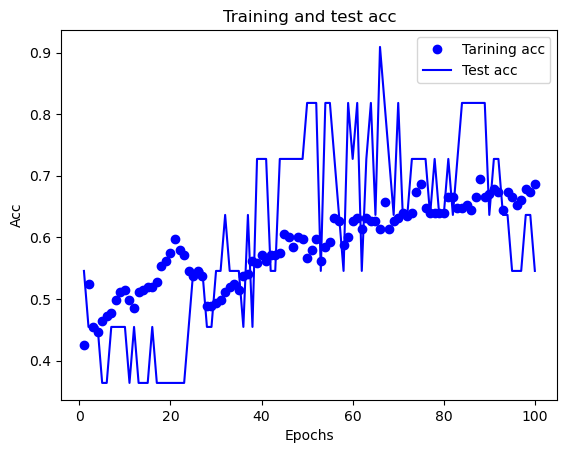

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_results) + 1)

plt.plot(epochs, results[results['type'] == 'train']['acc'], 'bo', label="Tarining acc")
plt.plot(epochs, results[results['type'] == 'test']['acc'], 'b', label="Test acc")
plt.title('Training and test acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

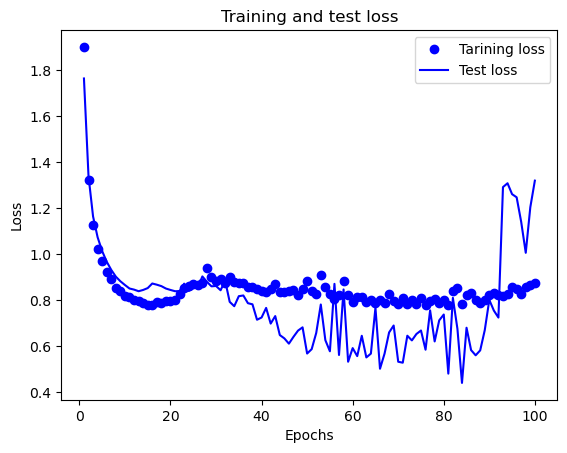

In [20]:

epochs = range(1, len(train_results) + 1)

plt.plot(epochs, results[results['type'] == 'train']['loss'], 'bo', label="Tarining loss")
plt.plot(epochs, results[results['type'] == 'test']['loss'], 'b', label="Test loss")
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()